In [25]:
# Required library imports
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from matplotlib_venn import venn2, venn3
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter
import re

In [34]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,4a16050093a99092,"No, you have to prove that I can't.",0,0,0,0,0,0
1,6bc2122dc27e275a,Re: My major edit summaries \n\nI have receive...,0,0,0,0,0,0
2,5570f7207bade92f,I depersonalized it. It's sad how you don't ob...,0,0,0,0,0,0
3,a17d6408ffb98139,Thats because I was blocked before I could dis...,0,0,0,0,0,0
4,11b1d25d77ffd834,"I apologise for this, I was just angry with ha...",0,0,0,0,0,0


In [35]:
test_data.head()

,id,comment_text
0,f88f17ce73d55ad9,"Mark Teixiera\nPer WP:CRYSTAL, we only change ..."
1,6a9f4af6d51fc9e2,"""\n\n Reblock \n\nReblock that IP you unblocke..."
2,c44f6d09834d1058,"""::::Censorship isn't an answer. Some things s..."
3,b1b2e8a5731c75d0,This is more fun than acrually editting!! \n\n...
4,f25b7274d05d8290,SarekOfVulcan RFA \n\nThank you for !voting on...


In [4]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111699 entries, 0 to 111698
Data columns (total 8 columns):
id               111699 non-null object
comment_text     111699 non-null object
toxic            111699 non-null int64
severe_toxic     111699 non-null int64
obscene          111699 non-null int64
threat           111699 non-null int64
insult           111699 non-null int64
identity_hate    111699 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.8+ MB


In [6]:
# function to identify comment_text which are clean. 
def clean_comments(row):
    if row['toxic'] == 1:
        return 0
    if row['severe_toxic'] == 1:
        return 0
    if row['obscene'] == 1:
        return 0
    if row['threat'] == 1:
        return 0
    if row['insult'] == 1:
        return 0
    if row['identity_hate'] == 1:
        return 0
    else:
        return 1

In [55]:
# all those comment_text which don't lie in any of the categories
data['Clean'] = data.apply(lambda row : clean_comments(row), axis = 1)

In [56]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Clean
0,4a16050093a99092,"No, you have to prove that I can't.",0,0,0,0,0,0,1
1,6bc2122dc27e275a,Re: My major edit summaries \n\nI have receive...,0,0,0,0,0,0,1
2,5570f7207bade92f,I depersonalized it. It's sad how you don't ob...,0,0,0,0,0,0,1
3,a17d6408ffb98139,Thats because I was blocked before I could dis...,0,0,0,0,0,0,1
4,11b1d25d77ffd834,"I apologise for this, I was just angry with ha...",0,0,0,0,0,0,1


In [57]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','Clean']

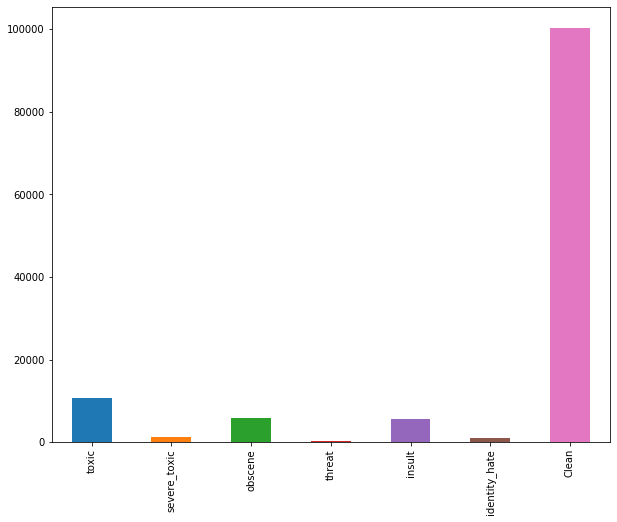

In [58]:

labels = data[class_names]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

labels.sum(axis=0).plot.bar()

In [59]:
corr_matrix = data.corr()

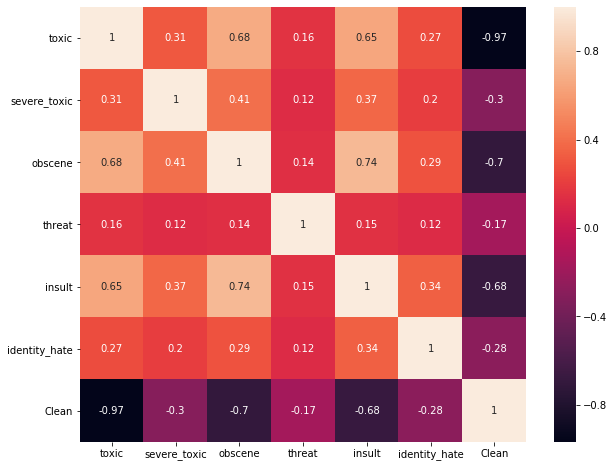

In [60]:
sns.heatmap(corr_matrix, annot = True)

In [61]:
# toxic & obscene
# toxic & insult
# insult & onscene

In [62]:
# text length
def text_len(row):
    return len(row['comment_text'])

In [63]:
data['text_length'] = data.apply(lambda row : text_len(row), axis = 1)

In [64]:
tokenizer = RegexpTokenizer(r'\w+')

In [65]:
def pre_process_text(sentence):
    
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    sentence = sentence.lower()

    return sentence


In [66]:
data['comment_text'][160]

'"\n\nRE:Illa J and Frank Nitt\nI was thinking of renaming the actual Yancey Boys article to Yancey Boys (album), in case you would create one about the group.  But, you are right. There isn\'t enough history on the Yancey Boys.  (talk • contribs) "'

In [67]:
pre_process_text(data['comment_text'][160])

' re illa and frank nitt was thinking of renaming the actual yancey boys article to yancey boys album in case you would create one about the group but you are right there isn enough history on the yancey boys talk contribs '

In [68]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Clean            0
text_length      0
dtype: int64